In [4]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris,load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [11]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
data = pd.DataFrame(X, columns=iris.feature_names)

# Standardize the data (important for clustering algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Helper function to plot clusters
def plot_clusters(X, labels, title="Clustering"):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=100, edgecolor='k')
    plt.title(title)
    plt.show()


``1. K-Means Clustering``


**Objective**: Group data into K predefined clusters.

**How It Works**:
- Randomly initialize K centroids.
- Assign each data point to the nearest centroid.
- Recalculate centroids as the mean of all points assigned to each cluster.
- Repeat until centroids stabilize.

**Pros**:
- Simple and easy to understand.
- Efficient for large datasets.

**Cons**:
- The number of clusters (K) must be specified beforehand.
- Sensitive to initial centroid placement and outliers.

---

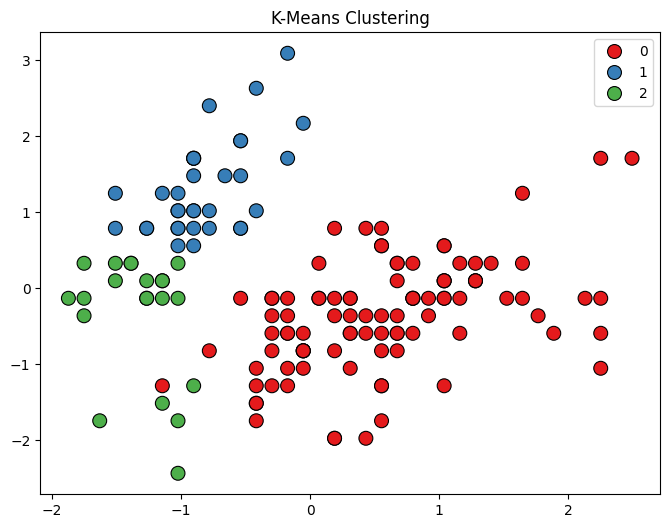

Silhouette Score for K-Means: 0.4798814508199817


In [12]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Plot K-Means clustering results
plot_clusters(X_scaled, kmeans_labels, title="K-Means Clustering")

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")


The silhouette score ranges from -1 to 1:

+1 indicates that the data point is very well clustered.

0 indicates that the point is on or very close to the decision boundary between two clusters.

-1 indicates that the point may have been assigned to the wrong cluster.

``2. Hierarchical Clustering``


**Objective**: Create a tree of clusters that can be visualized as a dendrogram.

**How It Works**:
- **Agglomerative (Bottom-up)**: Start with each data point as its own cluster, then merge the closest pairs of clusters iteratively.
- **Divisive (Top-down)**: Start with all data in a single cluster and recursively split it.

**Pros**:
- No need to specify the number of clusters in advance.
- Results in a tree structure for easy visualization of data relationships.

**Cons**:
- Computationally expensive, especially for large datasets.

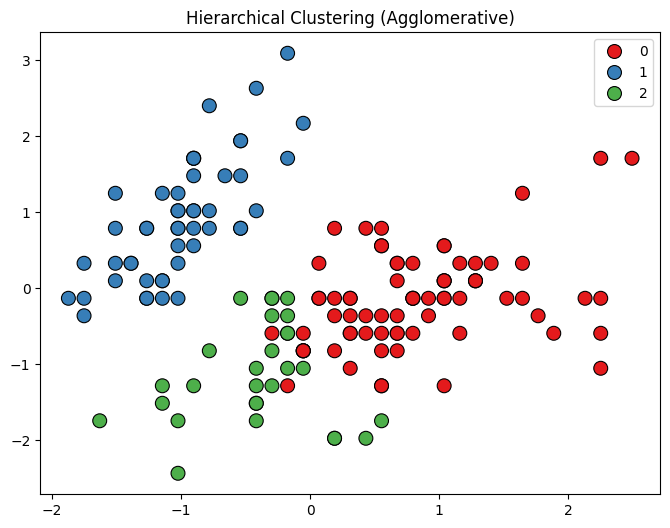

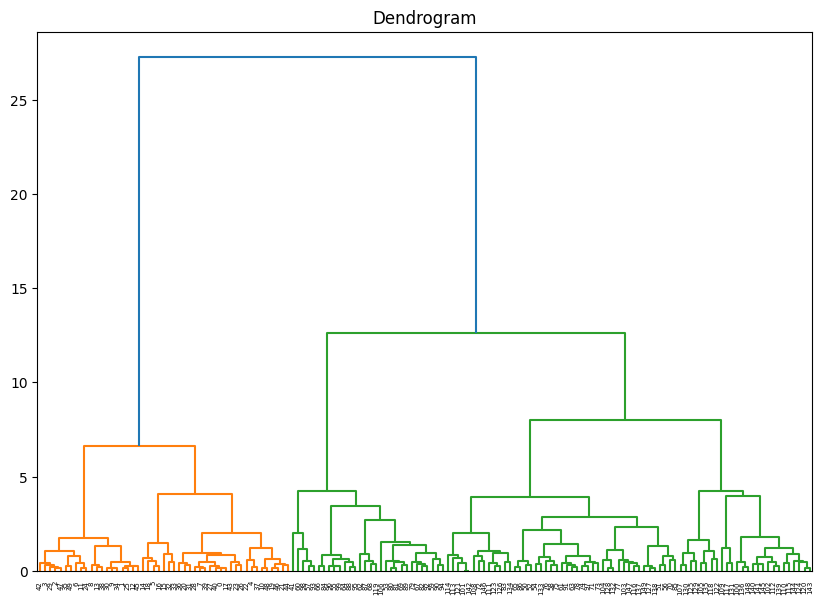

In [13]:
# Apply Hierarchical Clustering (Agglomerative)
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

# Plot Hierarchical clustering results
plot_clusters(X_scaled, agglo_labels, title="Hierarchical Clustering (Agglomerative)")

# Dendrogram Visualization
plt.figure(figsize=(10, 7))
linked = linkage(X_scaled, 'ward')
dendrogram(linked)
plt.title("Dendrogram")
plt.show()


``# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)``

**Objective**: Find clusters based on density rather than distance.

**How It Works**:
- Defines clusters as areas of high point density.
- Identifies points in low-density regions as outliers (noise).
- Uses two parameters:
  - **epsilon (ε)**: Defines the radius of the neighborhood around a point.
  - **minPts**: Minimum number of points required to form a dense region.

**Pros**:
- Does not require specifying the number of clusters.
- Can find arbitrarily shaped clusters.
- Handles noise and outliers well.

**Cons**:
- Sensitive to the choice of parameters (ε and minPts).


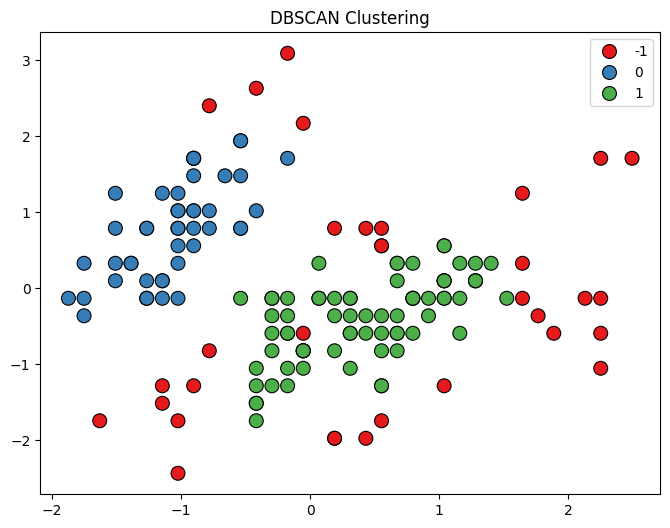

Silhouette Score for DBSCAN: 0.35651648142700726


In [14]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Plot DBSCAN clustering results
plot_clusters(X_scaled, dbscan_labels, title="DBSCAN Clustering")

# Silhouette Score for DBSCAN (excluding noise points -1)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")


``# Mean Shift``

**Objective**: Find clusters based on the maximum density of data points.

**How It Works**:
- Iteratively shifts data points towards regions of higher density until convergence.

**Pros**:
- Does not require specifying the number of clusters.
- Works well with arbitrary cluster shapes.

**Cons**:
- Computationally expensive.
- Performance can degrade on high-dimensional data.

---

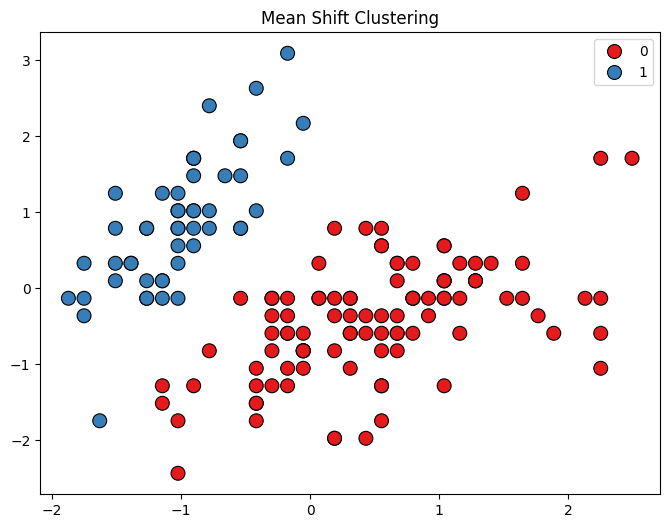

In [ ]:
# Apply Mean Shift
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X_scaled)

# Plot Mean Shift clustering results
plot_clusters(X_scaled, mean_shift_labels, title="Mean Shift Clustering")



``# Gaussian Mixture Models (GMM)``

**Objective**: Model the data as a mixture of multiple Gaussian distributions.

**How It Works**:
- Each cluster is modeled as a Gaussian distribution.
- The Expectation-Maximization (EM) algorithm is used to iteratively estimate the parameters (mean, covariance) of each Gaussian.

**Pros**:
- Can model more complex cluster shapes compared to K-Means.
- Provides probabilistic cluster assignments.

**Cons**:
- More computationally intensive than K-Means.
- Assumes that the data follows a Gaussian distribution.

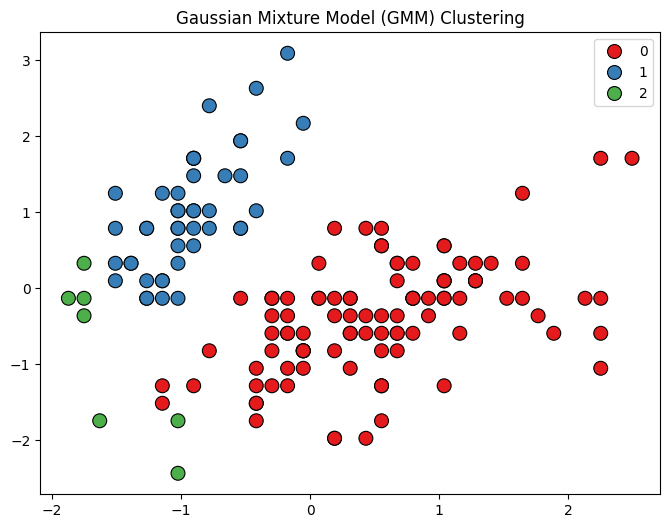

In [ ]:
# Apply GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Plot GMM clustering results
plot_clusters(X_scaled, gmm_labels, title="Gaussian Mixture Model (GMM) Clustering")


``# Principal Component Analysis (PCA)``

**Objective**: Reduce the dimensionality of data while preserving as much variance as possible.

**How It Works**:
1. **Standardization**: The data is centered by subtracting the mean of each feature, and scaled (if necessary) so that features have unit variance.
2. **Covariance Matrix**: The covariance matrix is computed to understand the relationships between features.
3. **Eigenvectors and Eigenvalues**: PCA finds the eigenvectors (principal components) of the covariance matrix. These eigenvectors define the directions of maximum variance in the data. Eigenvalues determine the magnitude of the variance captured by each eigenvector.
4. **Projection**: The data is projected onto a new set of axes (the principal components), effectively reducing the number of dimensions while retaining the most important information.

**Pros**:
- Helps reduce overfitting by reducing the number of features.
- Speeds up machine learning algorithms by reducing computational complexity.
- Helps in visualizing high-dimensional data in lower dimensions (e.g., 2D or 3D).

**Cons**:
- Assumes linear relationships between features.
- Difficult to interpret the transformed features (principal components).
- Does not handle categorical data well without encoding.

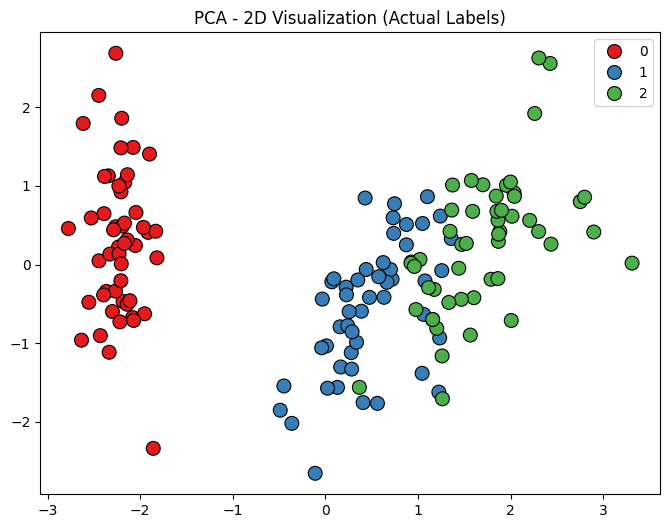

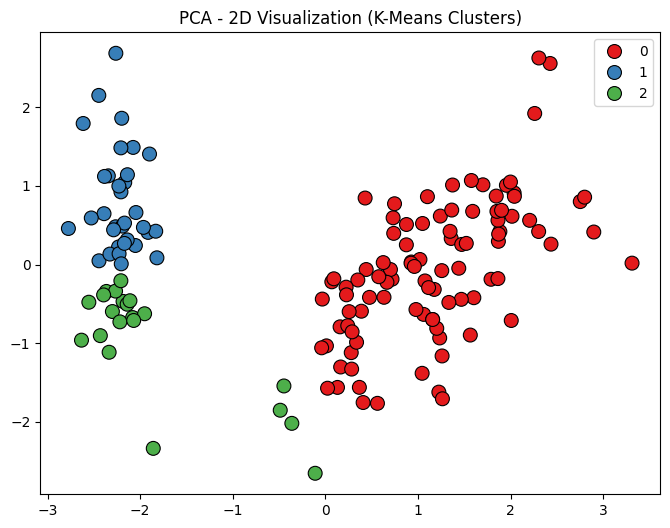

Explained Variance Ratio by PCA Components: [0.72962445 0.22850762]


In [ ]:
# Apply PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA projection with the actual target labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', s=100, edgecolor='k')
plt.title("PCA - 2D Visualization (Actual Labels)")
plt.show()

# Plot PCA projection with K-Means clustering labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1', s=100, edgecolor='k')
plt.title("PCA - 2D Visualization (K-Means Clusters)")
plt.show()

# Explained variance ratio for the PCA components
print(f"Explained Variance Ratio by PCA Components: {pca.explained_variance_ratio_}")

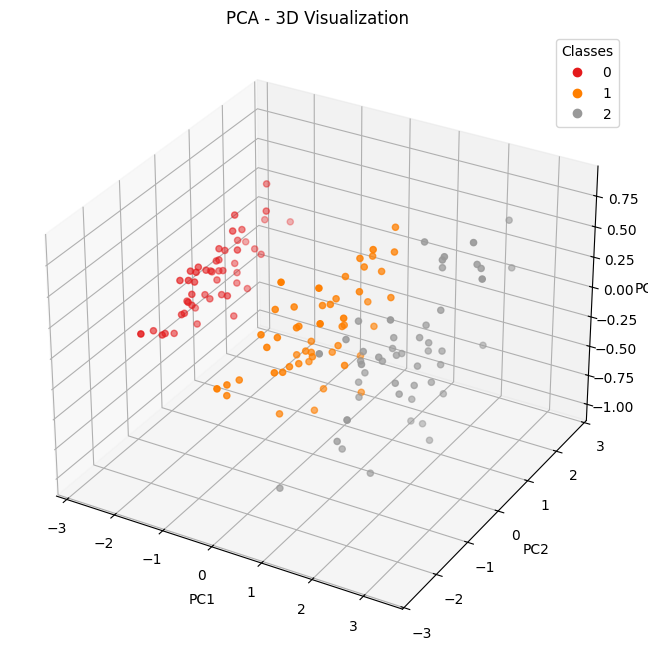

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce to 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='Set1')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("PCA - 3D Visualization")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()
